In [2]:
import numpy as np
import pandas as pd
from sympy import isprime
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from ant_colony  import ant_colony

In [3]:
cities = pd.read_csv('../input/cities.csv')
cities_len = len(cities)
print("len: ", cities_len)
cities_xy = np.stack((cities.X.values, cities.Y.values), axis=1)
cities_xy[0:5]

len:  197769


array([[ 316.83673906, 2202.34070734],
       [4377.40597217,  336.60208217],
       [3454.15819771, 2820.05301125],
       [4688.09929763, 2935.89805581],
       [1010.69695175, 3236.75098903]])

In [4]:
def get_score(path):
    xy = cities_xy[path]
    values = np.linalg.norm(xy-np.roll(xy, -1, axis=0), axis=1)[:-1]
    prime_value = (values[9::10] * [int(isprime(i)==False)*0.1 for i in path[:-1][9::10]]).sum()
    return values.sum() + prime_value

def get_dist_values(path:np.ndarray):
    xy = cities_xy[path]
    values = np.linalg.norm(xy-np.roll(xy, -1, axis=0), axis=1)[:-1]
    values[9::10] += values[9::10] * [int(isprime(i)==False)*0.1 for i in path[:-1][9::10]]
    return values

def get_dist_values_not_prime(path):
    xy = cities_xy[path]
    return np.linalg.norm(xy-np.roll(xy, -1, axis=0), axis=1)[:-1]

def get_score_not_prime(path):
    values = get_dist_values_not_prime(path)
    return values.sum()

In [7]:
#path = pd.read_csv('../input/submission_20181210.csv')
path = pd.read_csv('../input/sample_submission.csv')
path = path['Path'].values
get_score(path)

446884407.5212081

In [33]:
nodes = {}
cities_len = 100
for i in range(cities_len):
    xy = cities_xy[i]
    nodes[i] = (xy[0], xy[1])
#nodes[cities_len] =  (cities_xy[0][0]+0.0000001, cities_xy[0][1]+0.0000001) 
#nodes

In [34]:
def distance(start, end):
    x_distance = abs(start[0] - end[0])
    y_distance = abs(start[1] - end[1])

    #c = sqrt(a^2 + b^2)
    import math
    return math.sqrt(pow(x_distance, 2) + pow(y_distance, 2))


colony = ant_colony(nodes, distance)
answer = colony.mainloop()
print(answer)

[0, 86, 10, 14, 64, 73, 55, 46, 80, 52, 8, 39, 61, 93, 22, 34, 4, 6, 60, 44, 41, 68, 48, 71, 91, 2, 23, 85, 89, 25, 3, 32, 17, 83, 56, 16, 49, 72, 97, 90, 31, 74, 43, 75, 9, 27, 54, 84, 65, 98, 50, 58, 21, 95, 35, 7, 81, 45, 42, 19, 76, 53, 37, 70, 82, 87, 11, 79, 38, 88, 40, 92, 15, 78, 24, 96, 20, 18, 66, 12, 67, 28, 33, 77, 26, 59, 57, 63, 1, 94, 51, 69, 47, 36, 62, 5, 30, 99, 29, 13]


In [49]:
a = [{} for i in range(2)]
a[0][1]=1
a[1][1]=3
a

[{1: 1}, {1: 3}]

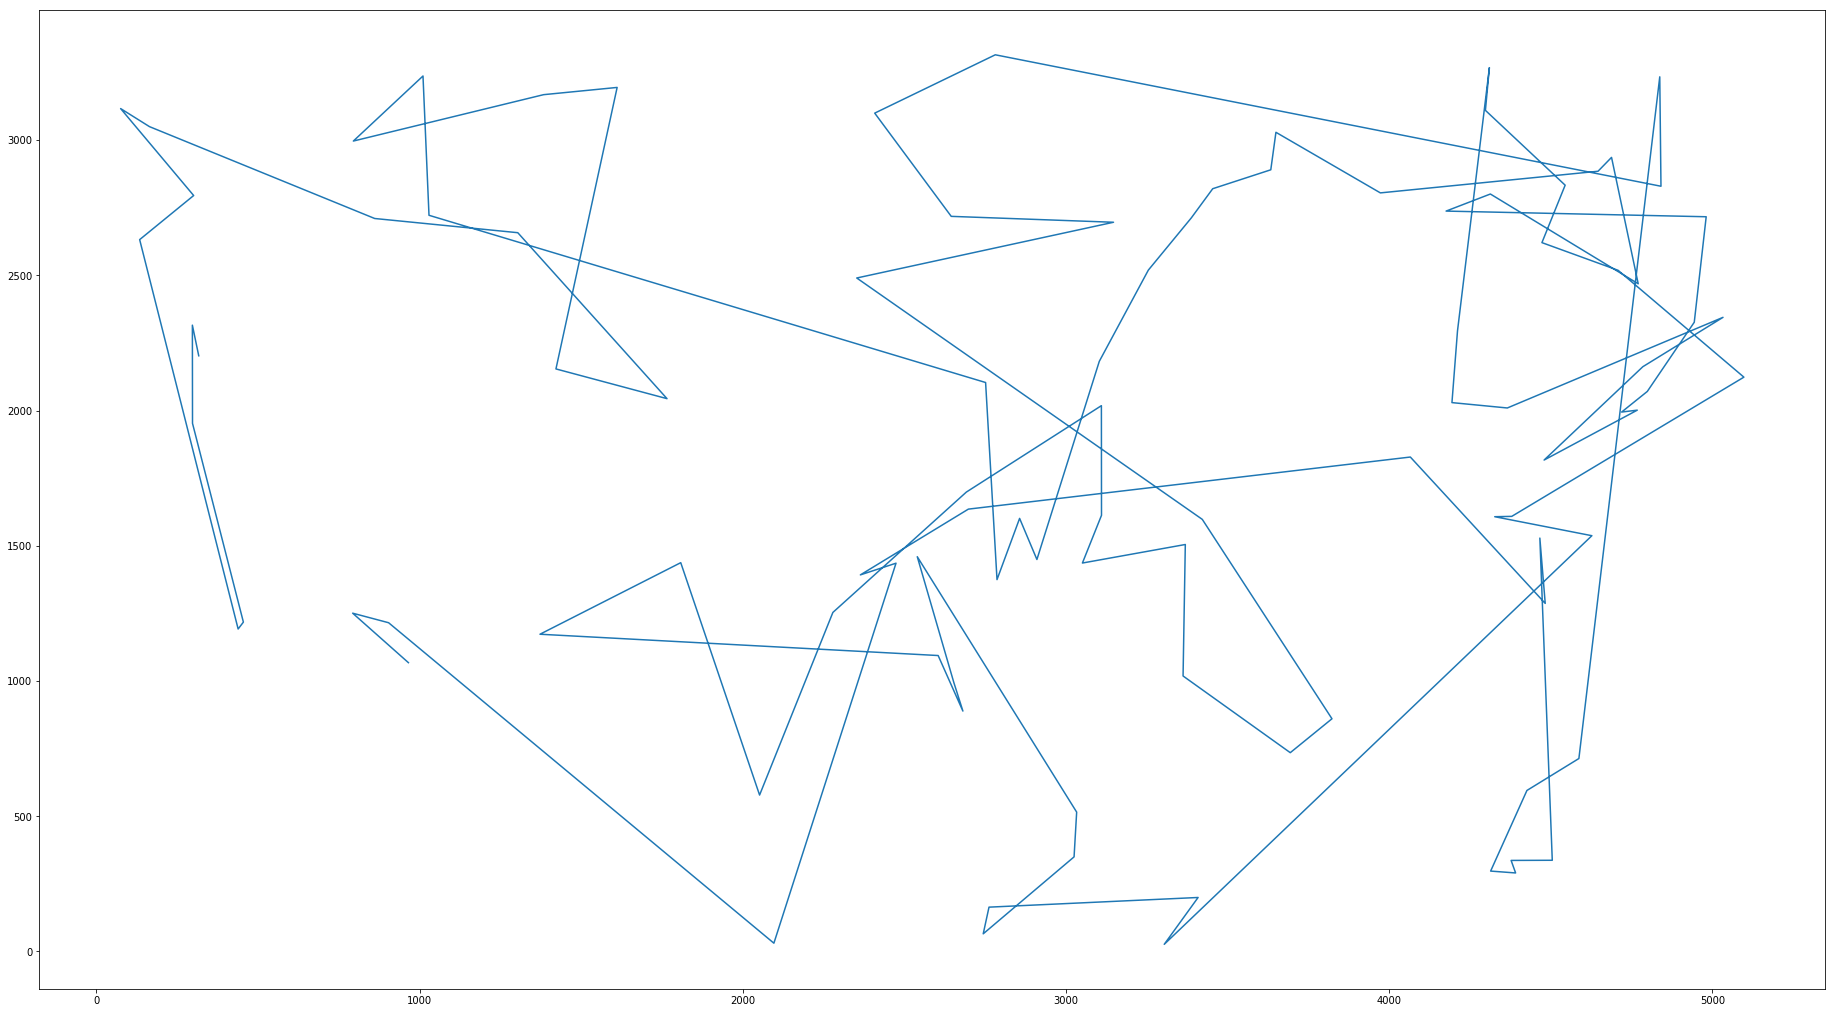

In [36]:
plt.figure(figsize=(32,18))
plt.rcParams['agg.path.chunksize'] = 10000 
plt.plot(cities.X[answer], cities.Y[answer])
plt.show()

In [16]:
#given some nodes, and some locations...
test_nodes = {0: (0, 7), 1: (3, 9), 2: (12, 4), 3: (14, 11), 4: (8, 11),
    5: (15, 6), 6: (6, 15), 7: (15, 9), 8: (12, 10), 9: (10, 7)}

#...and a function to get distance between nodes...
def distance(start, end):
    x_distance = abs(start[0] - end[0])
    y_distance = abs(start[1] - end[1])

    #c = sqrt(a^2 + b^2)
    import math
    return math.sqrt(pow(x_distance, 2) + pow(y_distance, 2))

#...we can make a colony of ants...
colony = ant_colony(test_nodes, distance)

#...that will find the optimal solution with ACO
answer = colony.mainloop()
print(answer)

[0, 1, 6, 4, 8, 3, 7, 5, 2, 9]
